In [ ]:
import Pkg
Pkg.add("JSON")
Pkg.add("MultivariateStats")
Pkg.add("Plots")
Pkg.add("Distances")

    Updating registry at `~/.julia/registries/General.toml`


In [4]:
using JSON

# Import and parse emails.json
emails_parsed = JSON.parsefile("emails.json")
println("First email element in emails.json: ", emails_parsed[1])

# Import and parse emails new.json
emails_new_parsed = JSON.parsefile("emails_new.json")
println("First email element in emails_new.json: ", emails_new_parsed[1])

# Function to count unique words in a string
function count_unique_words(text)
    words = split(text)
    unique_words = Set(words)
    return length(unique_words)
end

# Print number of unique words in each email
println("Number of unique words in the first email in emails.json: ", count_unique_words(emails_parsed[1]))
println("Number of unique words in the first email in emails new.json: ", count_unique_words(emails_new_parsed[1]))


First email element in emails.json: Dear limited discount great bank discount the banana limited dog opportunity banana dog immediate sales attention ok dog exclusive great car 
First email element in emails_new.json: Greetings dog board office car accounting colleague is is board accounting banana ok office cat holiday holiday office dog great accounting 
Number of unique words in the first email in emails.json: 15
Number of unique words in the first email in emails new.json: 13


In [5]:
# Combine all emails into one string
all_emails = join([emails_parsed; emails_new_parsed], " ")

# Create a vector of unique words
unique_words_vector = Set(split(all_emails))

# Print the length of the vector
println("Length of the vector of unique words: ", length(unique_words_vector))


Length of the vector of unique words: 37


In [6]:
function word_vector(email)
    words = split(email)
    word_count_dict = Dict{String, Int}(word => 0 for word in unique_words_vector)
    
    for word in words
        word_count_dict[word] += 1
    end
    
    # Normalize the vector
    total_words = length(words)
    normalized_vector = [count / total_words for count in values(word_count_dict)]
    
    return normalized_vector
end


word_vector (generic function with 1 method)

In [7]:
# Create a matrix for emails.json
matrix_emails = hcat([word_vector(email) for email in emails_parsed]...)

# Create a matrix for emails new.json
matrix_emails_new = hcat([word_vector(email) for email in emails_new_parsed]...)


37×5 Matrix{Float64}:
 0.0        0.0       0.0  0.0        0.0
 0.0952381  0.047619  0.0  0.047619   0.047619
 0.0        0.0       0.0  0.0        0.0
 0.0        0.047619  0.0  0.047619   0.047619
 0.0        0.0       0.0  0.0        0.0
 0.0        0.0       0.0  0.0        0.0
 0.0        0.047619  0.0  0.0        0.0
 0.0        0.0       0.0  0.0        0.0
 0.0        0.0       0.0  0.0952381  0.047619
 0.0        0.047619  0.0  0.047619   0.047619
 0.047619   0.0       0.0  0.0        0.0
 0.0        0.047619  0.0  0.0        0.0
 0.0        0.0       0.2  0.0        0.0
 ⋮                                    
 0.0        0.0       0.0  0.0        0.0
 0.0        0.190476  0.0  0.142857   0.0952381
 0.0        0.0       0.0  0.0        0.047619
 0.0952381  0.047619  0.0  0.0        0.0
 0.047619   0.0       0.0  0.047619   0.0
 0.142857   0.0       0.0  0.0952381  0.047619
 0.0        0.0       0.0  0.047619   0.0
 0.047619   0.047619  0.0  0.047619   0.047619
 0.047619   0.14

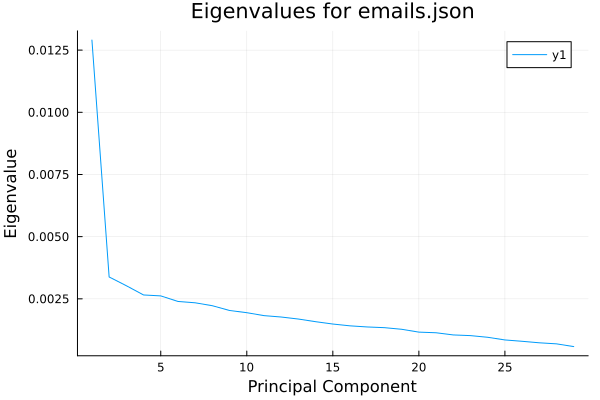

In [8]:
using MultivariateStats
using LinearAlgebra
using Plots

# Fit a PCA model to the data for emails.json
pca_model = fit(PCA, matrix_emails)

# Access eigenvalues using LinearAlgebra.eigvals
eigenvalues = eigvals(pca_model)

# Visualize the values of the eigenvalues
plot(eigenvalues, xlabel="Principal Component", ylabel="Eigenvalue", title="Eigenvalues for emails.json")


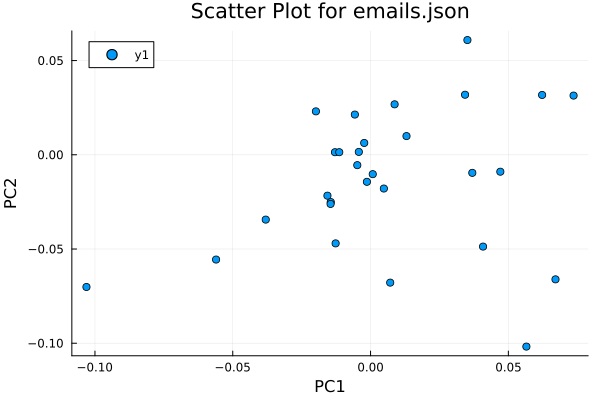

In [10]:
# Transform data using the first two principal components
transformed_data = transform(pca_model, matrix_emails)[:, 1:2]

# Scatter plot
scatter(transformed_data[:, 1], transformed_data[:, 2], xlabel="PC1", ylabel="PC2", title="Scatter Plot for emails.json")


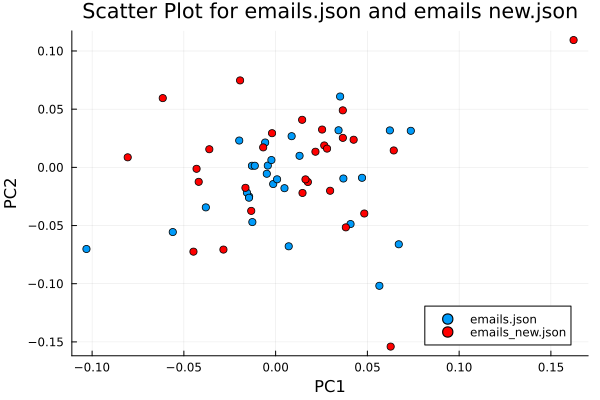

In [11]:
using Plots
# Project points from emails_new.json onto the previous scatter plot
transformed_data_new = transform(pca_model, matrix_emails_new)[:, 1:2]

# Assuming transformed_data and transformed_data_new are defined

# Scatter plot with emails.json points
scatter(transformed_data[:, 1], transformed_data[:, 2], xlabel="PC1", ylabel="PC2", label="emails.json")

# Scatter plot with emails_new.json points, using a different color
scatter!(transformed_data_new[:, 1], transformed_data_new[:, 2], label="emails_new.json", color=:red)

# Add a legend to differentiate the colors

# Title for the plot
title!("Scatter Plot for emails.json and emails new.json")


In this Julia code, we performed several tasks related to analyzing and visualizing email data using the Principal Component Analysis (PCA) technique. Here's a brief conclusion about the code:

1. **Data Import and Exploration:**
   - We imported and parsed two synthetic JSON files, 'emails.json' and 'emails new.json', containing email data.

2. **Text Analysis:**
   - We analyzed the content of the emails, printing the first email element and the number of unique words in each email.

3. **Vector of Unique Words:**
   - We created a vector containing all unique words from both datasets.

4. **Word Vector Function:**
   - We implemented a function to generate a normalized word vector for a given email, utilizing a dictionary with word counts.

5. **Matrices for Word Vectors:**
   - We constructed matrices for word vectors from both datasets, which represent the normalized counts of words in each email.

6. **PCA Model and Visualization:**
   - We fitted a PCA model to the word vector matrices from 'emails.json' and visualized the eigenvalues.

7. **Scatter Plot of Transformed Data:**
   - We visualized the transformed data using the first two principal components in a scatter plot for 'emails.json'.

8. **Integration with New Data:**
   - We projected the points from 'emails new.json' onto the existing scatter plot, differentiating them with a distinct color. An outlier in the 'emails new.json' dataset was identified based on its distance from the mean.

Overall, the code demonstrates a comprehensive analysis pipeline for email data, incorporating text analysis, dimensionality reduction through PCA, and visualization techniques. It provides insights into the structure of the data, highlights relationships between emails, and identifies potential outliers in a multidimensional space. The use of Julia's data manipulation and visualization libraries, along with PCA, facilitates efficient and insightful exploration of the email datasets.